<a href="https://colab.research.google.com/github/luisdiaz1997/DataScienceCourse/blob/master/Week7_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers = np.array([[-3, -3], [1, 1], [5, -2]]))

In [0]:
from sklearn.preprocessing import OneHotEncoder

def onehot(y):
  enc = OneHotEncoder()
  enc.fit(np.unique(y)[:, None])
  y_train = enc.transform(y[:, None]).toarray()
  return y_train

In [0]:
y_train = onehot(y)



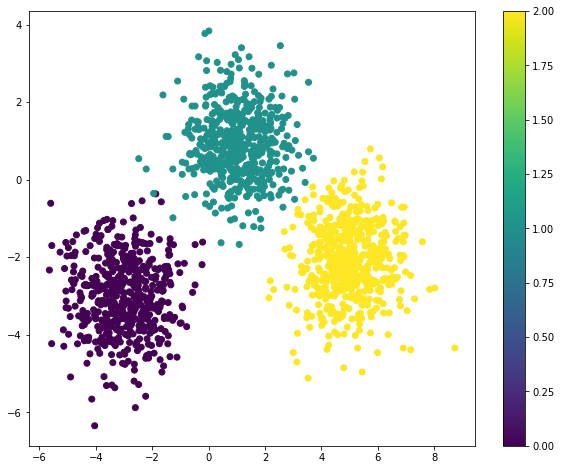

In [5]:
plt.figure(1, figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.colorbar();

In [0]:
def linear(x, w, b):
  z = np.dot(x,w) + b
  return z

In [0]:
def start_params(classes, features = 2):
  params = {'W': np.random.randn(features, classes), 'b': np.random.randn(1, classes)}
  return params

In [0]:
def loss(model, inputs, targets, regularizer = 0):
  error = targets*np.log(model(inputs) + 1e-3) + (1-targets)*np.log( 1 - model(inputs) + 1e-3)

  return np.sum(-error/inputs.shape[0]) + np.sum(regularizer*(model.params['W']**2)/(2*inputs.shape[0]))

In [0]:
def grad(model, inputs, targets, regularizer = 0):

  error = model(inputs) - targets
  grad_dict = {'dW': (np.dot(inputs.T, error) + regularizer*model.params['W'])/inputs.shape[0],
               'db': np.sum(error, axis = 0, keepdims=  True)/inputs.shape[0]}
  return grad_dict

In [0]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [0]:
class LogisticRegression():
  def __init__(self, classes = 3, features = 2):
    self.params = start_params(classes, features)
    self.costs = []
  
  def __call__(self, inputs):
    return sigmoid(linear(inputs, self.params['W'], self.params['b']))

  def fit(self, inputs, targets, learning_rate = 1e-3, regularizer = 0, epochs= 10):
    for i in tqdm(range(epochs)):
      self.costs.append(loss(self, inputs, targets, regularizer))
      grads = grad(self, inputs, targets, regularizer)

      for key, values in self.params.items():
        self.params[key] -= learning_rate * grads['d'+key]



In [0]:
model = LogisticRegression(classes = 3)

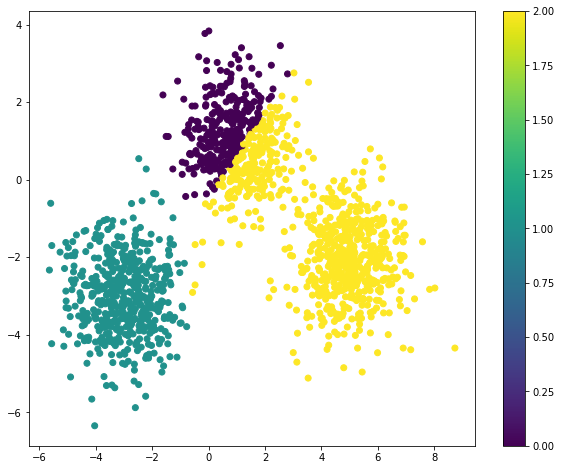

In [13]:
plt.figure(2, figsize = (10,8))

y_predict = np.argmax(model(X), axis = 1)
plt.scatter(X[:, 0], X[:, 1], c = y_predict.reshape(-1))
plt.colorbar();

In [14]:
model.fit(X, y_train, learning_rate = 0.1, epochs = 5000)

100%|██████████| 5000/5000 [00:04<00:00, 1184.49it/s]


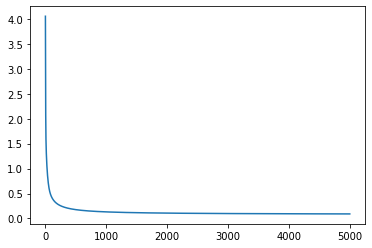

In [15]:
plt.plot(model.costs)

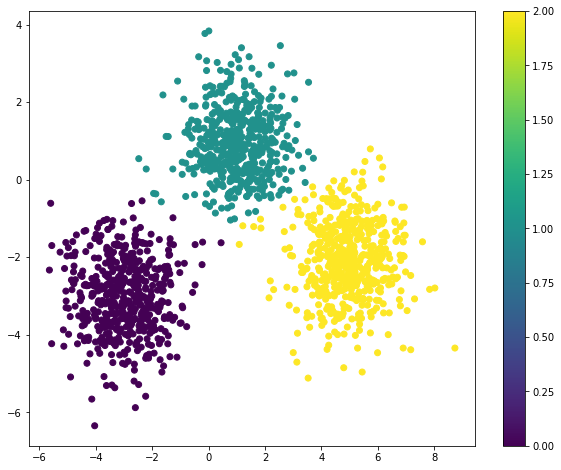

In [16]:
plt.figure(3, figsize = (10,8))

y_predict = np.argmax(model(X), axis = 1)
plt.scatter(X[:, 0], X[:, 1], c = y_predict.reshape(-1))
plt.colorbar();

In [17]:
np.round(model(X), 3)

array([[0.   , 0.998, 0.049],
       [0.   , 0.   , 0.999],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 0.001, 0.999],
       [1.   , 0.   , 0.   ],
       [0.   , 0.943, 0.094]])

In [18]:
np.argmax(model(X), axis = 1)

array([1, 2, 0, ..., 2, 0, 1])

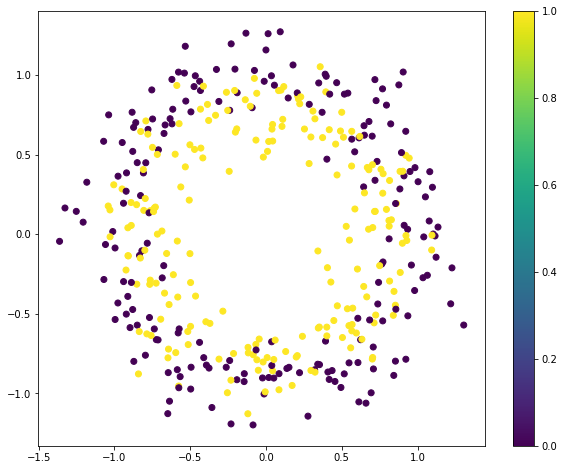

In [19]:
from sklearn.datasets import make_circles
n_samples = 400
random_state = 170
X, y = make_circles(n_samples=n_samples, random_state=random_state, noise = 0.15)



plt.figure(4, figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.colorbar();

In [0]:
def add_polynomials(x, order = 7):
    
    x_new = list()
    for i in range(1, order+1):
        for j in range(i+1):
            x_new.append((x[:,0]** (i-j)) *(x[:,1]** (j))) 
    x_new = np.array(x_new)
    
    
    return x_new.T

In [0]:
X_p = add_polynomials(X)

In [0]:
model2 = LogisticRegression(classes = 1, features = X_p.shape[1])

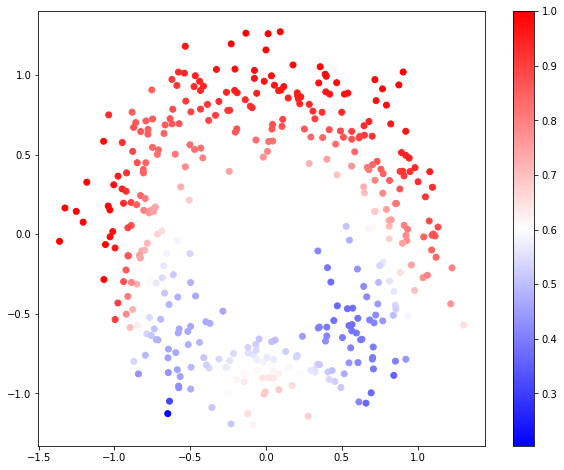

In [23]:
plt.figure(5, figsize = (10,8))

y_predict = model2(X_p)
plt.scatter(X[:, 0], X[:, 1], c = y_predict.reshape(-1), cmap = 'bwr')
plt.colorbar();

In [24]:
model2.fit(X_p, y[:, None], learning_rate = 1, epochs = 5000, regularizer= 10)

100%|██████████| 5000/5000 [00:01<00:00, 3233.61it/s]


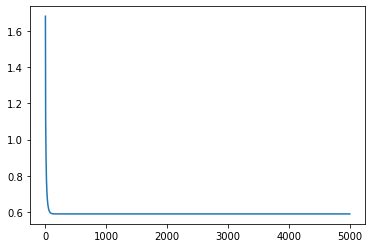

In [25]:
plt.plot(model2.costs)

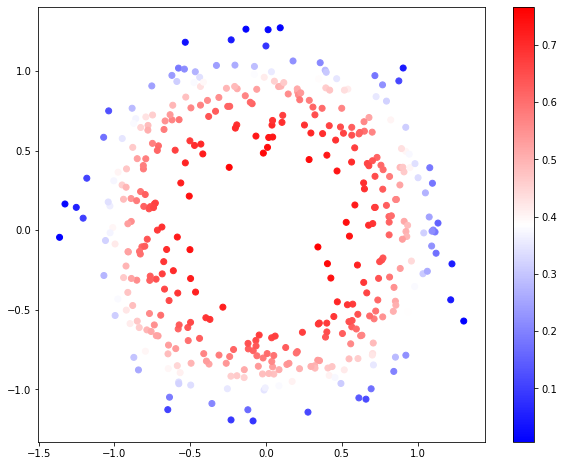

In [26]:
plt.figure(6, figsize = (10,8))

y_predict = model2(X_p)
plt.scatter(X[:, 0], X[:, 1], c = y_predict.reshape(-1), cmap = 'bwr')
plt.colorbar();

In [0]:
def get_grid(x):
    a = np.linspace(x[:, 0].min() -1, x[:, 0].max() +1, 1000)
    b = np.linspace(x[:, 1].min() -1, x[:, 1].max()+1, 1000)
    xx, yy = np.meshgrid(a, b, sparse=False)
    zz = np.stack((xx,yy), axis =2)
    inp = zz.reshape(-1, 2)
    return xx, yy, inp

In [0]:
xx, yy, grid = get_grid(X)

In [0]:
grid_p = add_polynomials(grid)

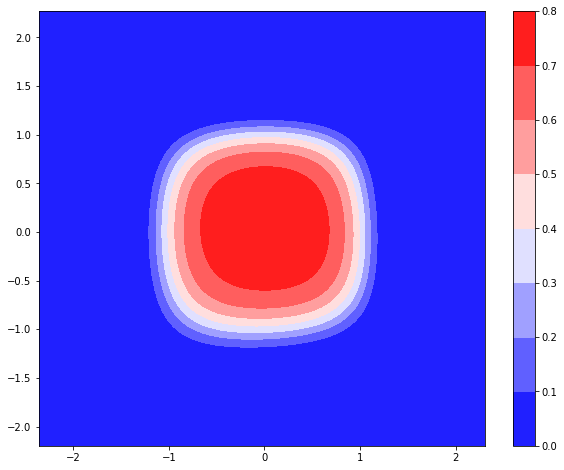

In [30]:
plt.figure(7, figsize = (10,8))

y_predict = model2(grid_p)


plt.contourf( xx, yy, y_predict.reshape(1000, 1000), cmap = 'bwr')
plt.colorbar();

In [31]:
np.round(model2.params['W'], 2)

array([[ 0.03],
       [ 0.11],
       [-0.59],
       [-0.02],
       [-0.71],
       [-0.01],
       [-0.09],
       [-0.01],
       [ 0.03],
       [-0.54],
       [-0.02],
       [-0.46],
       [ 0.07],
       [-0.64],
       [-0.03],
       [-0.05],
       [-0.  ],
       [-0.07],
       [-0.05],
       [-0.04],
       [-0.54],
       [-0.02],
       [-0.28],
       [ 0.02],
       [-0.3 ],
       [ 0.08],
       [-0.56],
       [-0.04],
       [-0.01],
       [ 0.01],
       [-0.05],
       [-0.03],
       [-0.03],
       [-0.05],
       [-0.11]])

In [32]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

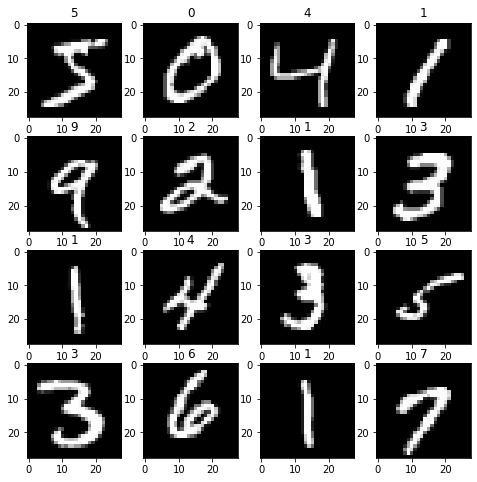

In [33]:
plt.figure(figsize= (8, 8))
k = 10
for k in range(16):
  plt.subplot(4, 4, k+1)
  plt.imshow(x_train[k], cmap = 'gray')
  plt.title(y_train[k]);

In [0]:
x_train2 = x_train.reshape(x_train.shape[0], -1)
x_test2 = x_test.reshape(x_test.shape[0], -1)


In [0]:
y_train2 = onehot(y_train)
y_test2 = onehot(y_test)

In [0]:
model3 = LogisticRegression(classes = 10, features= x_train2.shape[1])

In [37]:
model3.fit(x_train2/255, y_train2, learning_rate= 10, epochs =10, regularizer= 0.1)

 10%|█         | 1/10 [00:00<00:06,  1.45it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


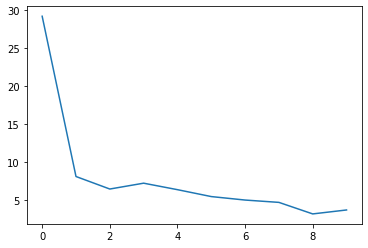

In [38]:
plt.plot(model3.costs)

In [0]:
y_predict = model3(x_train2/255)

In [40]:
np.sum(np.argmax(y_predict, axis = 1) == y_train)/x_train2.shape[0]

0.7184333333333334

In [0]:
test_predict = model3(x_test2/255)

In [42]:
np.sum(np.argmax(test_predict, axis = 1) == y_test)/test_predict.shape[0]

0.7232

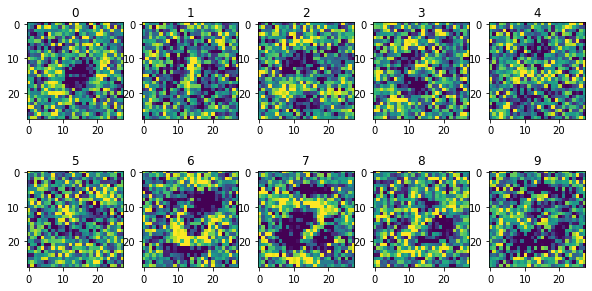

In [43]:
plt.figure(figsize= (10, 5))
k = 10
for k in range(10):
  plt.subplot(2, 5, k+1)
  plt.imshow(model3.params['W'][:, k].reshape(28, 28), vmin = -1.5, vmax =1.5)
  plt.title(k);